    Department Of Computer Science
    COMP338, Artificial Intelligence
    Dr. Mohammed Helal
    COMP338 | Section  


## <div align=center> Assignment #1 </div>
<div align=center><b>Round Table Seating Arrangement </b></div>
<div align=center>Search Problem </div>

    Prepeared by: Abdallah Aabed   
    ID: 1210802
<hr>

#### <b>Abstract</b>
In this report, the Round Table Seating arrangemnet is approached diffrently formulated as a search problem. The approchaes are ucs, greedy and A* searches. Then a comparison is made between them. Throughout this report, the tehory, implemnattions, discussion and conclusion are presented.

#### <b>Table of Contents</b>
- <b>Introduction</b>
- <b>Objectives</b>
- <b>Theory</b>
- <b>Software Versions</b>
- <b>Algorithms Implementations</b>
- <b>Discussion</b>
- <b>Conclusion</b>

#### <b>List of Figures</b>
- Figure 0: Given Dislike Matrix
- Figure 1: 
- Figure 2: 
- Figure 3: 
- Figure 4: 

#### <b>List of Tables</b>
- Table 1: 
- Table 2: Software Listenings

#### <b>Introduction</b>

In this notebook a heuristic table representing the dislike percentages between pairs of individuals, indicating the level of conflict or discomfort each person feels towards others is provided. The goal is to seat the individuals around a round table in the most suitable arrangement to minimize conflict while ensuring that each person can talk to their neighbors on the left and right. The heuristic table provides dislike percentages between pairs of individuals, with higher percentages indicating greater dislike or conflict. For example, a dislike percentage of 20% between Person A and Person B indicates a low level of conflict, while a dislike percentage of 80% indicates a high level of conflict. The follwing figure shows the matrix:

<div align='center'>

![alt text](./attachments/matrix.png)

<b>Figure 1: </b>Given Dislike Matrix
</div>

Requirements:
- Each person should be seated next to their neighbors on the left and right to facilitate conversation.
- The seating arrangement should form a closed loop, as it is a round table.

#### <b>Objectives</b>
- To implemnet Uniform Cost Search (UCS) algorithm
- To implemet Greedy Search algorithm
- To implement A* Search algorithm
- To determine which algorithm can find the best seating arrangement that minimizes conflict based on the provided heuristic table and the Non-Linear Dislike Cost function.

#### <b>Theory</b>

##### Informed Vs. Uninformed Search

##### UCS

##### Greedy

##### A star search

#### <b>Software Tools and Versions</b>

The followning table shows the software tools and versions used in this experimnet.

Table 2: Software Listenings

<div align="center">


|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|

</div>

<b>Neccessary Imports</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#### <b>Algorithms Implementations</b>


<b>The follownig dislike matrix was given:</b>

In [2]:
dislike_matrix = {
    'Khalid': {'Khalid': 0.0, 'Ibrahim': 0.45, 'Fuad': 0.78, 'Hakam': 0.81, 'Samir': 0.26, 'Kamal': 0.75, 'Hani': 0.92, 'Ayman': 0.64, 'Salem': 0.99, 'Ahmed': 0.43},
    'Ibrahim': {'Khalid': 0.45, 'Ibrahim': 0.0, 'Fuad': 0.81, 'Hakam': 0.87, 'Samir': 0.37, 'Kamal': 0.42, 'Hani': 0.53, 'Ayman': 0.88, 'Salem': 0.62, 'Ahmed': 0.76},
    'Fuad': {'Khalid': 0.78, 'Ibrahim': 0.81, 'Fuad': 0.0, 'Hakam': 0.92, 'Samir': 0.97, 'Kamal': 0.53, 'Hani': 0.99, 'Ayman': 0.90, 'Salem': 0.17, 'Ahmed': 0.10},
    'Hakam': {'Khalid': 0.81, 'Ibrahim': 0.87, 'Fuad': 0.92, 'Hakam': 0.0, 'Samir': 0.63, 'Kamal': 0.88, 'Hani': 0.78, 'Ayman': 0.51, 'Salem': 0.55, 'Ahmed': 0.33},
    'Samir': {'Khalid': 0.26, 'Ibrahim': 0.37, 'Fuad': 0.97, 'Hakam': 0.63, 'Samir': 0.0, 'Kamal': 0.43, 'Hani': 0.86, 'Ayman': 0.96, 'Salem': 0.20, 'Ahmed': 0.48},
    'Kamal': {'Khalid': 0.75, 'Ibrahim': 0.42, 'Fuad': 0.53, 'Hakam': 0.88, 'Samir': 0.43, 'Kamal': 0.0, 'Hani': 0.91, 'Ayman': 0.63, 'Salem': 0.76, 'Ahmed': 0.82},
    'Hani': {'Khalid': 0.92, 'Ibrahim': 0.53, 'Fuad': 0.99, 'Hakam': 0.78, 'Samir': 0.86, 'Kamal': 0.91, 'Hani': 0.0, 'Ayman': 0.70, 'Salem': 0.11, 'Ahmed': 0.30},
    'Ayman': {'Khalid': 0.64, 'Ibrahim': 0.88, 'Fuad': 0.90, 'Hakam': 0.51, 'Samir': 0.96, 'Kamal': 0.63, 'Hani': 0.70, 'Ayman': 0.0, 'Salem': 0.90, 'Ahmed': 0.55},
    'Salem': {'Khalid': 0.99, 'Ibrahim': 0.62, 'Fuad': 0.17, 'Hakam': 0.55, 'Samir': 0.20, 'Kamal': 0.76, 'Hani': 0.11, 'Ayman': 0.90, 'Salem': 0.0, 'Ahmed': 0.68},
    'Ahmed': {'Khalid': 0.43, 'Ibrahim': 0.76, 'Fuad': 0.10, 'Hakam': 0.33, 'Samir': 0.48, 'Kamal': 0.82, 'Hani': 0.30, 'Ayman': 0.55, 'Salem': 0.68, 'Ahmed': 0.0},
}

In [3]:
df_dislike = pd.DataFrame.from_dict(dislike_matrix, orient='index')
df_dislike

,Khalid,Ibrahim,Fuad,Hakam,Samir,Kamal,Hani,Ayman,Salem,Ahmed
Khalid,0.00,0.45,0.78,0.81,0.26,0.75,0.92,0.64,0.99,0.43
Ibrahim,0.45,0.00,0.81,0.87,0.37,0.42,0.53,0.88,0.62,0.76
Fuad,0.78,0.81,0.00,0.92,0.97,0.53,0.99,0.90,0.17,0.10
Hakam,0.81,0.87,0.92,0.00,0.63,0.88,0.78,0.51,0.55,0.33
Samir,0.26,0.37,0.97,0.63,0.00,0.43,0.86,0.96,0.20,0.48
Kamal,0.75,0.42,0.53,0.88,0.43,0.00,0.91,0.63,0.76,0.82
Hani,0.92,0.53,0.99,0.78,0.86,0.91,0.00,0.70,0.11,0.30
Ayman,0.64,0.88,0.90,0.51,0.96,0.63,0.70,0.00,0.90,0.55
Salem,0.99,0.62,0.17,0.55,0.20,0.76,0.11,0.90,0.00,0.68
Ahmed,0.43,0.76,0.10,0.33,0.48,0.82,0.30,0.55,0.68,0.00


<b>Initilaize the edges and the nodes from the datframe</b>

Using a Graph datastructure

In [4]:
graph = nx.Graph()
graph.add_nodes_from(df_dislike.index)

for i in range(len(df_dislike)):
    for j in range(i + 1, len(df_dislike)):
        graph.add_edge(df_dislike.index[i], df_dislike.index[j], weight=df_dislike.iloc[i, j])

<b>Weighted Grpah Visualization</b>

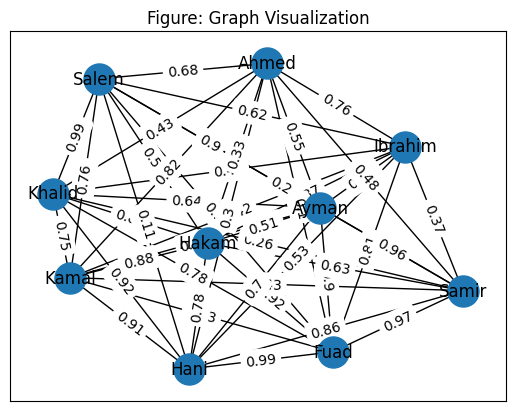

In [5]:
pos = nx.spring_layout(graph)  
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_nodes(graph, pos, node_size=500)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
nx.draw_networkx_labels(graph, pos)
plt.title('Figure: Graph Visualization')
plt.show()

This is a complete graph which means that there exists a path between any two vertices in the graph

<b>Cost Function</b>

The cost function used is a Non-Linear Dislike Cost function. Define a non-linear function f(x) that maps dislike percentages to costs. e.g., f(x) = x^2 would make high dislike percentages have a quadratically higher cost.

`f(n) = sum(dislike_percentages_between_neighbors)+ sum(f(dislike_percentages_between_neighbors))`

The aim of this function is to penalize highly disliked pairs more severely than just a constant of a linear mapping.

In [6]:
def f(n):
    """
    Args:

    Returns:

    """
    dislike_percentages_between_neighbors = 0 #to calculate
    cost = np.sum(np.sum(dislike_percentages_between_neighbors), np.sum(f(dislike_percentages_between_neighbors)))
    return cost

<b>Uniform Cost Search (UCS) algorithm Implementation</b>

In [7]:
def  uniform_cost_search(start_person, graph):
    """
    An implemnetation of Uniform Cost Search (UCS) algorithm that finds the shortest path
    Args:
        
    Returns:

    """
    return 

<b>Greedy Search algorithm Implementation</b>

In [8]:
def  greedy_search(start_person, graph):
    """
    An implemnetation of greedy search algorithm that finds the shortest path
    Args:
        
    Returns:
   
    """
    return 

<b>A* Search algorithm Implementation</b>

Heuristic Function

In [9]:
def heurestic_function(person_1, person_2):
    """ 
    Args:
        person_1():
        person_2():
    Returns:
        cost
    """
    cost = 0
    return cost

In [10]:
def  a_star_search(start_person, graph, heurestic_function):
    """
    An implemnetation of A* algorithm that finds the shortest path
    Args:
        
    Returns:
        
    """
    return 

<b>Compare Results</b>

In [11]:
def compare_results(start_person, graph, heurestic_function):
    """
    This function calls the three algorithms to compare them.
    Args:
        start_person (str):
        dislike_matrix (dict): 
        heurestic_function (): 
    Return:
        
    """
    uniform_cost_search(start_person, graph)
    greedy_search(start_person, graph)
    a_star_search(start_person, graph, heurestic_function)

#### <b>Discussion</b>


In [12]:
compare_results(input('Start Person:'), graph, heurestic_function)

Tasks:
1. Implement the UCS, Greedy, and A* search algorithms to find the seating
arrangement.
2. Incorporate the Non-Linear Dislike Cost function into the search algorithms' evaluation process.
3. Evaluate the effectiveness of each algorithm in finding the best seating arrangement based on the conflict minimization objective.
4. Compare the obtained seating arrangements and discuss the strengths and weaknesses of each algorithm in this context.
5. Present your findings, including the final seating arrangements and analysis of
algorithm performance, in a report.

#### <b>Conclusion</b>
In conclusion, the objectives are met ... It was found that

#### <b>Refrences</b>

- https://www.datacamp.com/tutorial/networkx-python-graph-tutorial, 2017